## 2.1 Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data
from einops import rearrange
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting


# Load MNIST Dataset
(x_train, y_train), _ = load_data()

2025-02-11 16:41:10.360010: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 16:41:10.369313: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 16:41:10.382518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739292070.405058  202164 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739292070.411302  202164 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 16:41:10.439081: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Randomly Select 1000 Samples

indices = np.random.choice(len(x_train), 1000, replace=False)
subset_images = x_train[indices]  # Shape: (1000, 28, 28)
subset_labels = y_train[indices]  # Shape: (1000,)

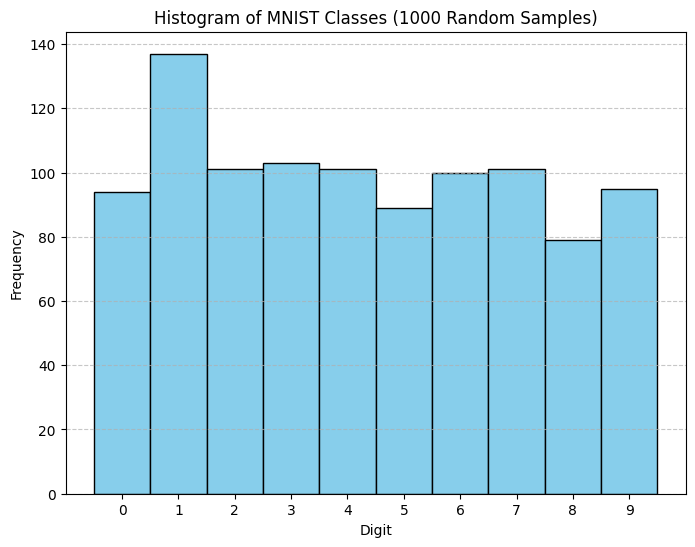

In [3]:
# Plot the Histogram using Matplotlib

plt.figure(figsize=(8, 6))
# np.arange(-0.5, 10.5, 1) creates bin edges that center the bars on the digits 0-9.
plt.hist(subset_labels, bins=np.arange(-0.5, 10.5, 1), color='skyblue', edgecolor='black')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Histogram of MNIST Classes (1000 Random Samples)')
plt.xticks(np.arange(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [4]:
# Rearrange the Images into Batches Using einops

batches_images = rearrange(subset_images, '(b s) h w -> b s h w', b=40)
print("Batches images shape:", batches_images.shape)  # Expected shape: (40, 25, 28, 28)

Batches images shape: (40, 25, 28, 28)


Selected image from batch 26, sample 12.


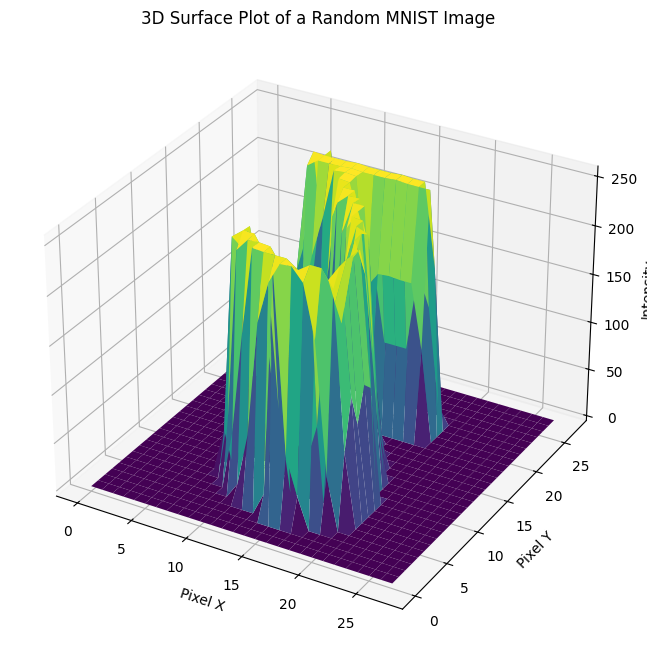

In [5]:
# Randomly Select an Image Sample from the Batches

batch_idx = np.random.randint(0, batches_images.shape[0])
sample_idx = np.random.randint(0, batches_images.shape[1])
selected_image = batches_images[batch_idx, sample_idx]  # This image has shape (28, 28)
print(f"Selected image from batch {batch_idx}, sample {sample_idx}.")

# Plot the Selected Image in 3D

x = np.arange(selected_image.shape[1])
y = np.arange(selected_image.shape[0])
X, Y = np.meshgrid(x, y)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, selected_image, cmap='viridis', edgecolor='none')
ax.set_xlabel('Pixel X')
ax.set_ylabel('Pixel Y')
ax.set_zlabel('Intensity')
ax.set_title('3D Surface Plot of a Random MNIST Image')

plt.show()

## 2.2 Time Series

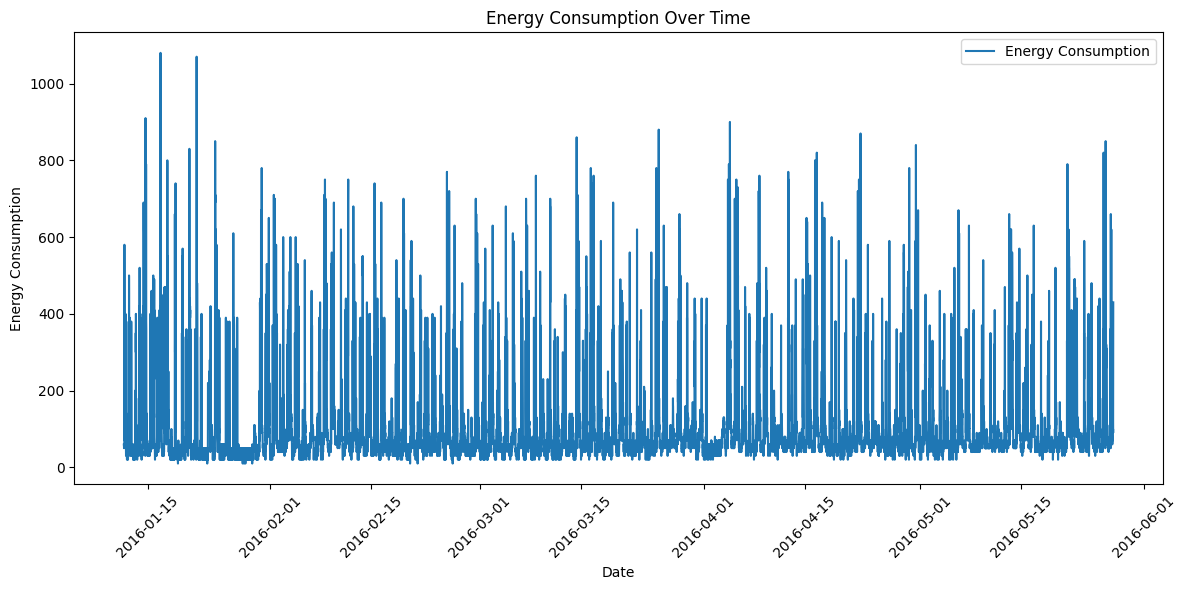

In [6]:
#Task 1
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file, focusing on the first two columns.
# 'parse_dates=[0]' ensures the first column is converted to datetime.
df = pd.read_csv("energydata_complete.csv", usecols=[0, 1], parse_dates=[0])

# Optional: Rename columns for clarity (if needed)
df.columns = ["Date", "EnergyConsumption"]

# Plotting the energy consumption over the whole period.
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["EnergyConsumption"], label="Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

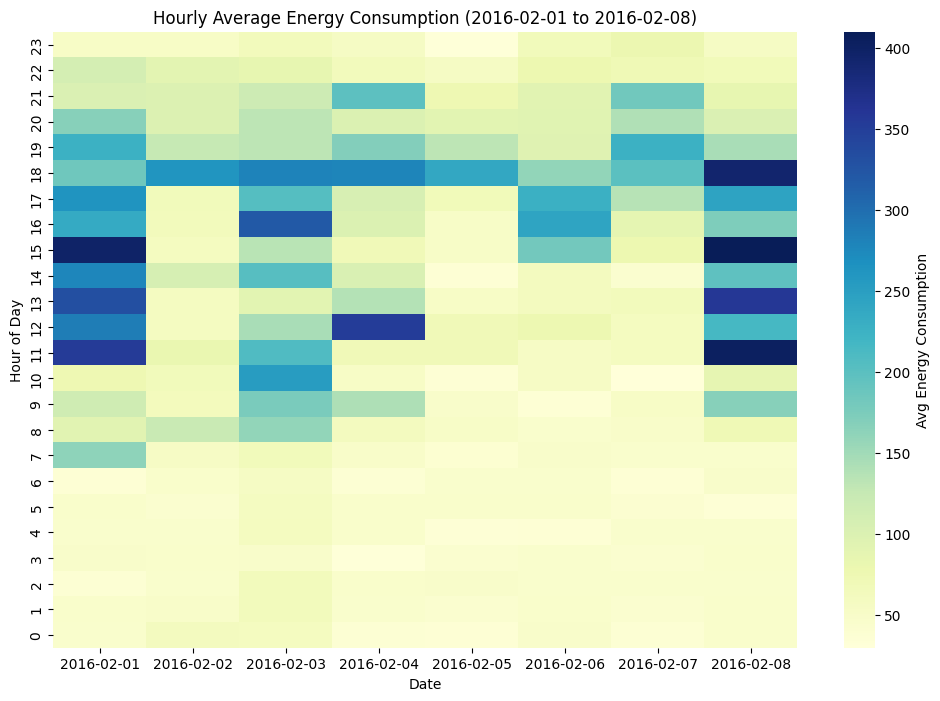

In [7]:
#Task2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with the Date (column 0) and Energy Consumption (column 1).
df = pd.read_csv("energydata_complete.csv", usecols=[0, 1], parse_dates=[0])
df.columns = ["Date", "EnergyConsumption"]

# Filter data for the week: 2016-02-01 to 2016-02-08 (inclusive)
mask = (df["Date"] >= "2016-02-01") & (df["Date"] < "2016-02-09")
df_week = df.loc[mask].copy()

# Create additional columns for just the date and the hour of the day.
df_week["DateOnly"] = df_week["Date"].dt.date
df_week["Hour"] = df_week["Date"].dt.hour

# Pivot the data to create a table where rows are hours (0-23) and columns are dates.
heat_data = df_week.pivot_table(index="Hour", columns="DateOnly", values="EnergyConsumption", aggfunc='mean')

# Plot the heat map using seaborn.
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heat_data, cmap="YlGnBu", cbar_kws={'label': 'Avg Energy Consumption'})
plt.gca().invert_yaxis()  # Reverse the y-axis so hour 23 is at the top.
plt.xlabel("Date")
plt.ylabel("Hour of Day")
plt.title("Hourly Average Energy Consumption (2016-02-01 to 2016-02-08)")
plt.show()

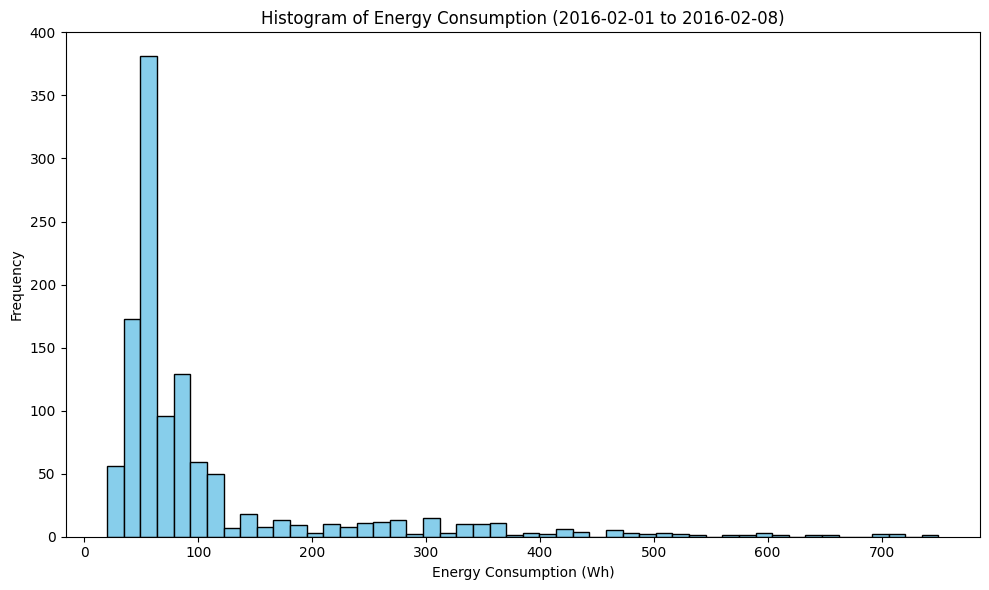

In [8]:
#Task3
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with Date and Energy Consumption columns.
df = pd.read_csv("energydata_complete.csv", usecols=[0, 1], parse_dates=[0])
df.columns = ["Date", "EnergyConsumption"]

# Filter data for the week: 2016-02-01 to 2016-02-08 (inclusive)
mask = (df["Date"] >= "2016-02-01") & (df["Date"] < "2016-02-09")
df_week = df.loc[mask]

# Plot the histogram of energy consumption for the filtered period.
plt.figure(figsize=(10, 6))
plt.hist(df_week["EnergyConsumption"], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Frequency")
plt.title("Histogram of Energy Consumption (2016-02-01 to 2016-02-08)")
plt.tight_layout()
plt.show()

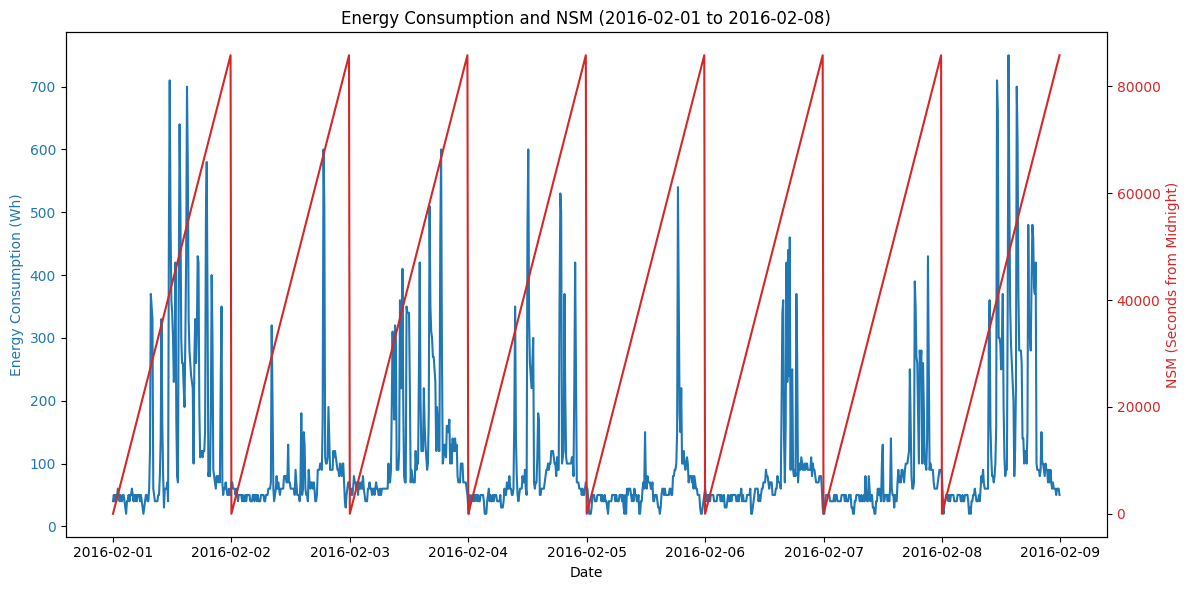

In [9]:
#Task4
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with Date (column 0) and Energy Consumption (column 1)
df = pd.read_csv("energydata_complete.csv", usecols=[0, 1], parse_dates=[0])
df.columns = ["Date", "EnergyConsumption"]

# Compute NSM: number of seconds from midnight
df['NSM'] = df['Date'].dt.hour * 3600 + df['Date'].dt.minute * 60 + df['Date'].dt.second

# Filter data for the period 2016-02-01 to 2016-02-08 (inclusive)
mask = (df["Date"] >= "2016-02-01") & (df["Date"] < "2016-02-09")
df_week = df.loc[mask]

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot energy consumption on the left y-axis
color1 = 'tab:blue'
ax1.plot(df_week['Date'], df_week['EnergyConsumption'], color=color1, label='Energy Consumption')
ax1.set_xlabel("Date")
ax1.set_ylabel("Energy Consumption (Wh)", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a twin axis for NSM on the right y-axis
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.plot(df_week['Date'], df_week['NSM'], color=color2, label='NSM (Seconds from Midnight)')
ax2.set_ylabel("NSM (Seconds from Midnight)", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and adjust layout
plt.title("Energy Consumption and NSM (2016-02-01 to 2016-02-08)")
fig.tight_layout()
plt.show()

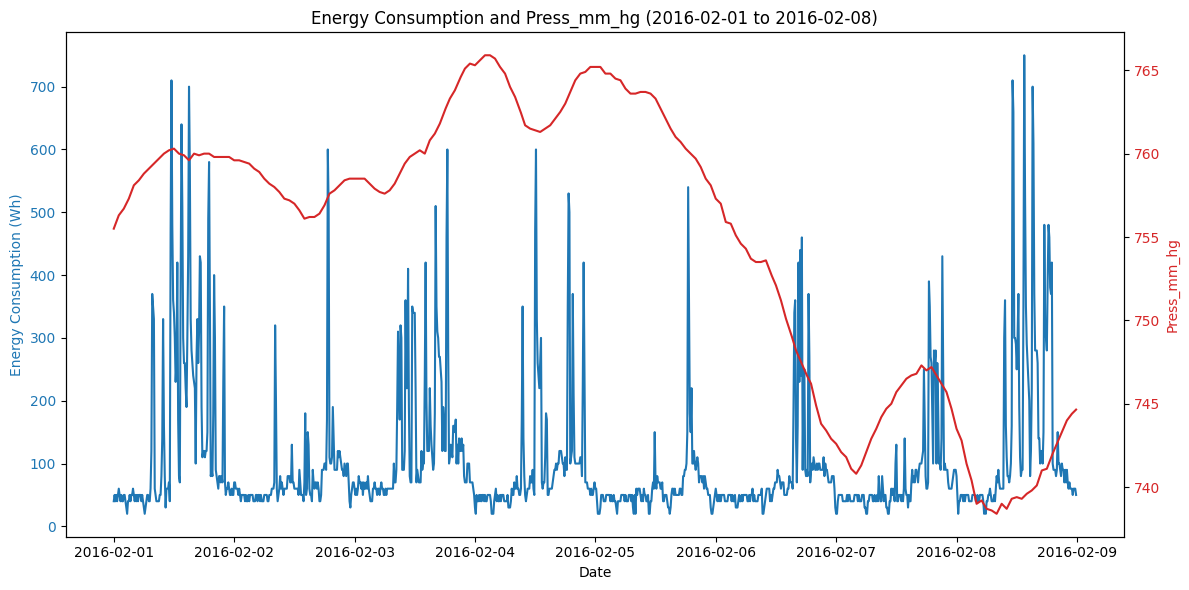

In [10]:
#Task5
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file using columns: 0 (Date), 1 (EnergyConsumption), and 22 (Press_mm_hg)
df = pd.read_csv("energydata_complete.csv", usecols=[0, 1, 22], parse_dates=[0])
df.columns = ["Date", "EnergyConsumption", "Press_mm_hg"]

# Filter data for the period 2016-02-01 to 2016-02-08 (inclusive)
mask = (df["Date"] >= "2016-02-01") & (df["Date"] < "2016-02-09")
df_week = df.loc[mask]

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot energy consumption on the left y-axis
color1 = 'tab:blue'
ax1.plot(df_week['Date'], df_week['EnergyConsumption'], color=color1, label='Energy Consumption')
ax1.set_xlabel("Date")
ax1.set_ylabel("Energy Consumption (Wh)", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a twin axis to plot Press_mm_hg on the right y-axis
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.plot(df_week['Date'], df_week['Press_mm_hg'], color=color2, label='Press_mm_hg')
ax2.set_ylabel("Press_mm_hg", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Energy Consumption and Press_mm_hg (2016-02-01 to 2016-02-08)")
fig.tight_layout()
plt.show()

#Task6: comment

Although the major contributing factors for energy consumption are NSM and Press_mm_Hg, in my case, which is from 2016-02-01 ~ 2016-02-08, I believe the energy consumption depends more on the NSM. The reason is the trend matches better. On the other hand, the trend of Press_mm_Hg and energy consumption does not match very well, for example, on 2016-02-04, the Press_mm_Hg is high, but the energy consumption is low during the early morning.

## 2.3 Multi-variate

In [11]:
import numpy as np
from scipy import stats

# Load the data from the file
data = np.loadtxt('airfoil_self_noise.dat')

# Define labels for each column:
# Column 0: frequency (Hz)
# Column 1: angle of attack (deg)
# Column 2: chord length (m)
# Column 3: free-stream velocity (m/s)
# Column 4: suction side displacement thickness (m)
# Column 5: scaled sound pressure level (dB)
labels = [
    "Frequency (Hz)",
    "Angle of Attack (deg)",
    "Chord Length (m)",
    "Free-stream Velocity (m/s)",
    "Suction Side Displacement Thickness (m)",
    "Scaled Sound Pressure Level (dB)"
]

# Loop over each column and compute the statistics
for i, label in enumerate(labels):
    col = data[:, i]
    
    # Mean
    mean_val = np.mean(col)
    
    # Variance (using ddof=1 gives the sample variance)
    variance_val = np.var(col, ddof=1)
    
    # Standard deviation (square root of the variance)
    std_val = np.std(col, ddof=1)
    
    # Median
    median_val = np.median(col)
    
    # Kurtosis (by default, scipy.stats.kurtosis returns the excess kurtosis)
    kurtosis_val = stats.kurtosis(col)
    
    # Skewness
    skewness_val = stats.skew(col)
    
    # Range (max - min)
    range_val = np.ptp(col)  # np.ptp returns the range
    
    # Print the results for the current column
    print(f"{label}:")
    print(f"  Mean = {mean_val:.4f}")
    print(f"  Variance = {variance_val:.4f}")
    print(f"  Standard Deviation = {std_val:.4f}")
    print(f"  Median = {median_val:.4f}")
    print(f"  Kurtosis = {kurtosis_val:.4f}")
    print(f"  Skewness = {skewness_val:.4f}")
    print(f"  Range = {range_val:.4f}\n")


Frequency (Hz):
  Mean = 2886.3806
  Variance = 9938717.3837
  Standard Deviation = 3152.5731
  Median = 1600.0000
  Kurtosis = 5.6857
  Skewness = 2.1350
  Range = 19800.0000

Angle of Attack (deg):
  Mean = 6.7823
  Variance = 35.0242
  Standard Deviation = 5.9181
  Median = 5.4000
  Kurtosis = -0.4156
  Skewness = 0.6885
  Range = 22.2000

Chord Length (m):
  Mean = 0.1365
  Variance = 0.0087
  Standard Deviation = 0.0935
  Median = 0.1016
  Kurtosis = -1.0385
  Skewness = 0.4570
  Range = 0.2794

Free-stream Velocity (m/s):
  Mean = 50.8607
  Variance = 242.5116
  Standard Deviation = 15.5728
  Median = 39.6000
  Kurtosis = -1.5627
  Skewness = 0.2356
  Range = 39.6000

Suction Side Displacement Thickness (m):
  Mean = 0.0111
  Variance = 0.0002
  Standard Deviation = 0.0132
  Median = 0.0050
  Kurtosis = 2.2075
  Skewness = 1.7005
  Range = 0.0580

Scaled Sound Pressure Level (dB):
  Mean = 124.8359
  Variance = 47.5915
  Standard Deviation = 6.8987
  Median = 125.7210
  Kurtosis 